# NFL Passing Stats Analysis (2001-2021)

## Introduction
The project, titled "NFL Passing Stats Analysis (2001-2021)," aims to explore and dissect the rich dataset of passing statistics in the National Football League (NFL) over the past two decades. By delving into the evolution of passing performance, this analysis seeks to uncover patterns, trends, and insights that shed light on how the game has transformed over time.

### Project Goals

This NFL Passing Stats Analysis project aims to achieve the following objectives:

1. **Trend Analysis:**
   - Explore how passing statistics (e.g., passing yards, passing touchdowns, interceptions) have evolved in the NFL from 2001 to 2021. Identify trends and changes in passing performance over the years.

2. **Positional Analysis:**
   - Investigate how passing statistics vary by player position (e.g., quarterbacks, wide receivers, tight ends, etc.) and identify which positions have the most significant impact on the passing game in terms of passing yards.

3. **Age-Related Trends:**
   - Examine how player age influences their passing performance. Identify trends in the age groups that tend to excel in passing statistics.

4. **Efficiency Metrics:**
   - Investigate metrics like completion percentage, yards per attempt, and adjusted yards per attempt to assess the efficiency of passing plays and how they can relate to one another.

These goals serve as the foundation for our analysis, allowing us to uncover insights and trends within the vast dataset of NFL passing statistics. By exploring passing performance, this project aspires to provide valuable information to see how passing in the NFL has evolved over the past 20+ years.

## Table of Contents
- [Data Collection](#data-collection)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
- [Results and Discussion](#results-and-discussion)
- [Conclusion](#conclusion)

## Data Collection
The dataset used for this project, "NFL Passing Stats Analysis (2001-2021)," was webscraped using Selenium from Pro Football Reference.

**Dataset Information:**

- **Title:** NFL Passing Stats Analysis (2001-2021)
- **Last Updated:** The dataset appears to have been completed or updated post the 2022 NFL season.

**Data Description:**

This dataset comprises 30 columns and 2,240 rows, categorizing the data into detailed information on passing statistics, player attributes, and team details for the specified NFL seasons.

## Exploratory Data Analysis (EDA)
Conduct an exploratory data analysis to understand the dataset. Visualize data distributions, correlations, and patterns. Use descriptive statistics to summarize data characteristics.

In [619]:
# importing external libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [620]:
# creating variable for dataset
passing_stats = pd.read_csv('passing_cleaned.csv')

# Create a new dataframe with the calculated metrics
metrics_df = passing_stats[['Year', 'Age', 'Cmp%', 'pY/A', 'AY/A', 'Rate']]
# Rename the columns for easier reading
metrics_df = metrics_df.rename(columns={
    'Year': 'Year',
    'Age': 'Player Age',
    'Cmp%': 'Completion Percentage',
    'pY/A': 'Yards Per Attempt',
    'AY/A': 'Adjusted Yards Per Attempt',
    'Rate': 'QB Rating'
})

# Create a mapping from original column names to full names
column_mapping = {
    'Year': 'Year',
    'Player': 'Player',
    'Tm': 'Team',
    'Age': 'Age',
    'Pos': 'Position',
    'G': 'Games Played',
    'GS': 'Games Started',
    'Cmp': 'Passes Completed',
    'pAtt': 'Pass Attempts',
    'Cmp%': 'Completion Percentage',
    'pYds': 'Passing Yards',
    'pTD': 'Passing Touchdowns',
    'Int': 'Interceptions',
}

# Use the mapping to rename columns in the DataFrame
passing_stats.rename(columns=column_mapping, inplace=True)

# List of column names to drop
columns_to_drop = ['Unnamed: 0', 'TD%', 'Int%', 'p1D', 'pLng', 'pY/A', 'AY/A', 'Y/C', 'pY/G', 'Sk', 'Yds-s', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD']

# Drop the specified columns
passing_stats.drop(columns=columns_to_drop, inplace=True)

# Check the first few rows of the modified DataFrame
passing_stats.head()

,Player,Team,Age,Position,Games Played,Games Started,Passes Completed,Pass Attempts,Completion Percentage,Passing Yards,Passing Touchdowns,Interceptions,Rate,Year
0,Kurt Warner,STL,30,QB,16,16,375,546,68.7,4830,36,22,101.4,2001
1,Peyton Manning,IND,25,QB,16,16,343,547,62.7,4131,26,23,84.1,2001
2,Brett Favre,GNB,32,QB,16,16,314,510,61.6,3921,32,15,94.1,2001
3,Aaron Brooks,NOR,25,QB,16,16,312,558,55.9,3832,26,22,76.4,2001
4,Rich Gannon,OAK,36,QB,16,16,361,549,65.8,3828,27,9,95.5,2001


In [621]:
passing_stats.describe()

,Age,Games Played,Games Started,Passes Completed,Pass Attempts,Completion Percentage,Passing Yards,Passing Touchdowns,Interceptions,Rate,Year
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,28.155357,10.288393,6.880357,105.239286,170.592411,55.096562,1199.862946,7.322768,4.675000,77.220804,2011.399554
std,4.384793,5.618896,6.388632,132.800474,209.726212,27.724195,1528.276122,10.289591,5.767546,32.176071,6.511041
min,21.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,2001.000000
25%,25.000000,5.000000,0.000000,1.000000,2.000000,50.000000,19.000000,0.000000,0.000000,56.200000,2006.000000
50%,27.000000,12.000000,5.000000,27.000000,48.500000,59.950000,295.000000,1.000000,2.000000,79.200000,2011.000000
75%,31.000000,16.000000,14.000000,204.000000,336.250000,66.500000,2338.000000,12.000000,9.000000,95.400000,2017.000000
max,45.000000,17.000000,17.000000,490.000000,733.000000,100.000000,5477.000000,55.000000,30.000000,158.300000,2022.000000


### **Trend Analysis**

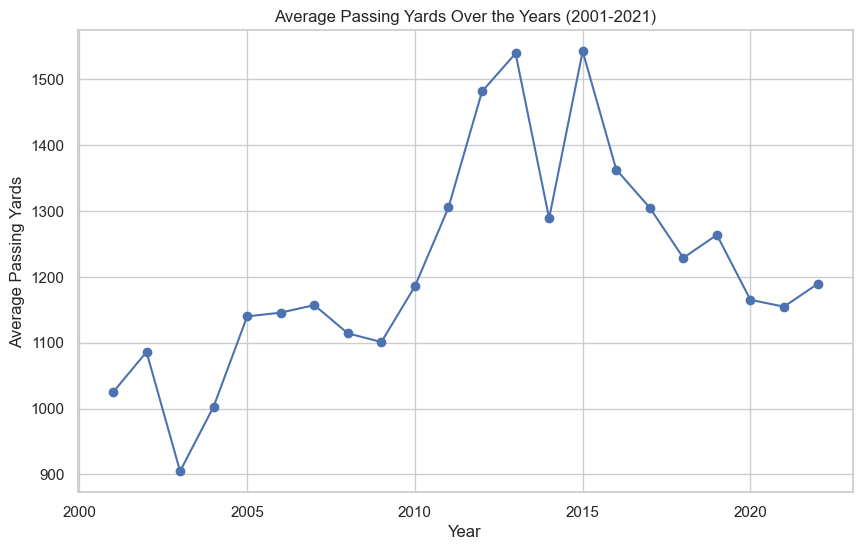

<Figure size 640x480 with 0 Axes>

In [622]:
# Group data by 'Year' and calculate the mean of 'Passing Yards' for each year
passing_yards_trend = passing_stats.groupby('Year')['Passing Yards'].mean()

# Create a line plot to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(passing_yards_trend.index, passing_yards_trend.values, marker='o')
plt.title('Average Passing Yards Over the Years (2001-2021)')
plt.xlabel('Year')
plt.ylabel('Average Passing Yards')
plt.grid(True)
plt.show()
plt.clf()


**Observation:**
A quick glance reveals the average passing yard numbers seem lower compared to what you might expect. This trend also caught my attention during the initial data review. To understand it better, we should consider a few possibilities.

One reason for these lower averages could be the performances of players in positions other than the quarterback, who typically do the most throwing. Alternatively, it might be due to quarterbacks who played fewer games. We'll dig deeper into these ideas as the analysis continues.

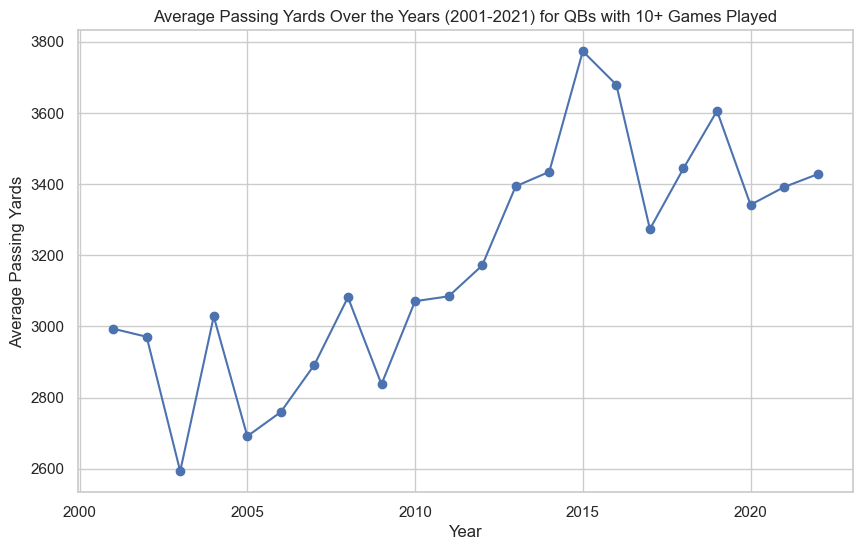

<Figure size 640x480 with 0 Axes>

In [623]:
import matplotlib.pyplot as plt

# Filter the data to include only QBs and players with a minimum of 10 games played
filtered_data = passing_stats[(passing_stats['Position'] == 'QB') & (passing_stats['Games Played'] >= 10)]

# Group the filtered data by 'Year' and calculate the mean of 'Passing Yards' for each year
passing_yards_trend_filtered = filtered_data.groupby('Year')['Passing Yards'].mean()

# Create a line plot to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(passing_yards_trend_filtered.index, passing_yards_trend_filtered.values, marker='o')
plt.title('Average Passing Yards Over the Years (2001-2021) for QBs with 10+ Games Played')
plt.xlabel('Year')
plt.ylabel('Average Passing Yards')
plt.grid(True)
plt.show()
plt.clf()

### Watching Passing Yards Rise and Fall

Looking at the chart showing how far a football is thrown in NFL games from 2001 to 2021, we can spot some interesting patterns:

**Starting with Ups and Downs:**
In the early 2000s, it seems like the distance the football was thrown by quarterbacks (the people who throw the football) goes up and down. Sometimes, they threw it around 2,700 to 3,000 yards, and sometimes a bit more or less.

**The Steady Climb:**
From 2006 onwards, things start going up consistently. The quarterbacks throw the football farther and farther each year, reaching around 3,500 yards. This is because the evolution of the game and strategies throughout the NFL are changing. Keeping these trends in mind, one can start to understand why the new age of football is often referred to as a 'passing league.'

**Big Jumps:**
In 2014 and 2015, something special happens. Quarterbacks throw the football a lot farther, more than 3,400 yards, and even around 3,700 yards. This is a brief period of super impressive performance from the quarterback position.

**Keeping Up the Good Work:**
From 2016 to 2019, the trend continues high, with quarterbacks throwing the football around 3,200 to 3,600 yards. They are really consistent during this time.

**Recent Years:**
In 2020 and 2021, there's a little dip, and they go back to throwing it just above 3,300 yards. It might be because they are trying different things or because of other changes.

This chart shows how quarterbacks in football are always trying to improve and adapt to different challenges. It's like a story of how they throw the football.

### **Positional Analysis**

In [624]:
# Count the number of times each position threw the ball
position_counts = passing_stats['Position'].value_counts()
position_counts

Position
QB       1615
WR        291
RB        144
P         130
K          20
TE         19
DB          7
FB          3
FS          2
WR/QB       2
LCB         1
NT          1
RLB         1
C           1
LS          1
MLB         1
LB          1
Name: count, dtype: int64

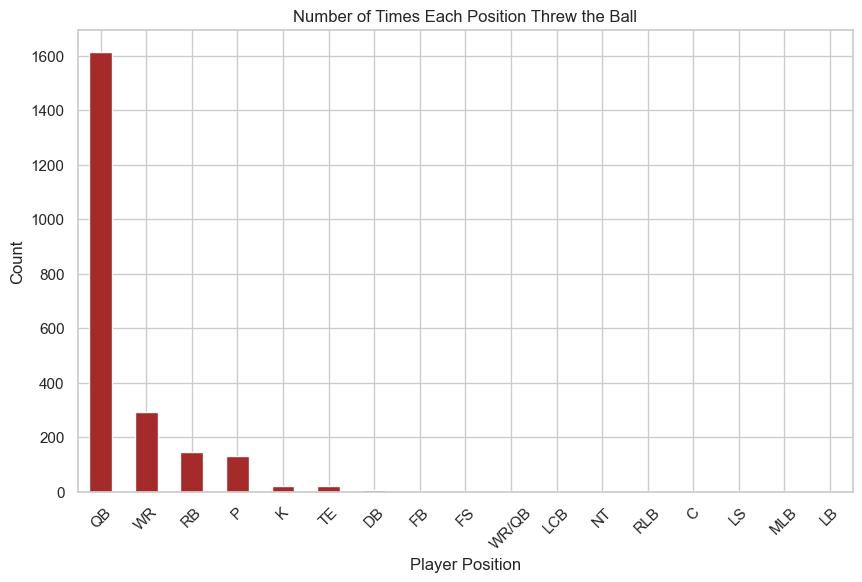

<Figure size 640x480 with 0 Axes>

In [625]:
# Count the number of times each position threw the ball
position_counts = passing_stats['Position'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='brown')
plt.title('Number of Times Each Position Threw the Ball')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.clf()

**Observing Player Positions Involved in Passing**

The first bar chart illustrates the number of times each player position was involved in passing plays. However, the chart includes quarterbacks (QBs), who are primarily responsible for throwing the football in American football games. As expected, QBs dominate the chart with the highest count.

**Excluding QBs for Clarity:**
To provide a clearer view of how other player positions contribute to passing, the following chart excludes QBs. This allows us to focus on the roles of running backs (RBs), wide receivers (WRs), tight ends (TEs), and other positions that play a part in the passing game. This exclusion simplifies the visualization and makes it easier to understand the distribution of passing responsibilities among non-QB positions.

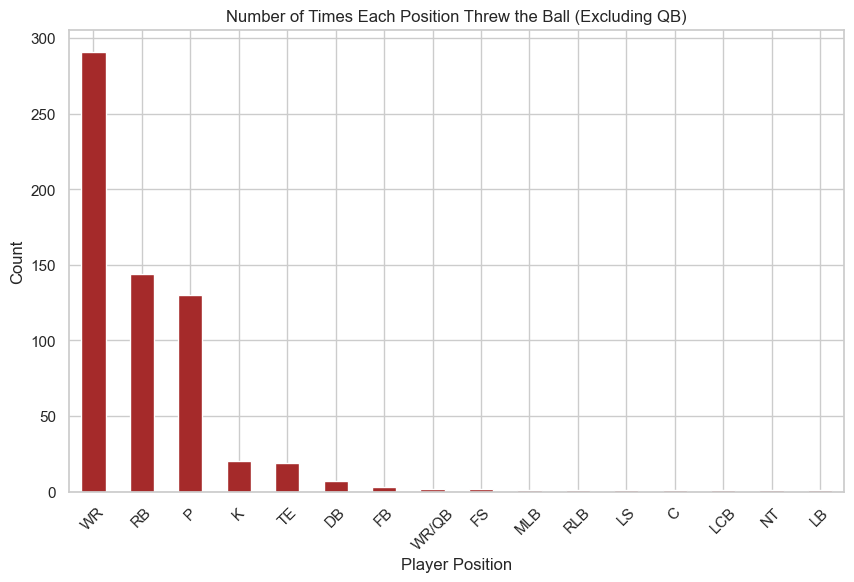

<Figure size 640x480 with 0 Axes>

In [626]:
import matplotlib.pyplot as plt

# Filter out the QB data
non_qb_stats = passing_stats[passing_stats['Position'] != 'QB']

# Count the number of times each non-QB position threw the ball
position_counts = non_qb_stats['Position'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='brown')
plt.title('Number of Times Each Position Threw the Ball (Excluding QB)')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.clf()

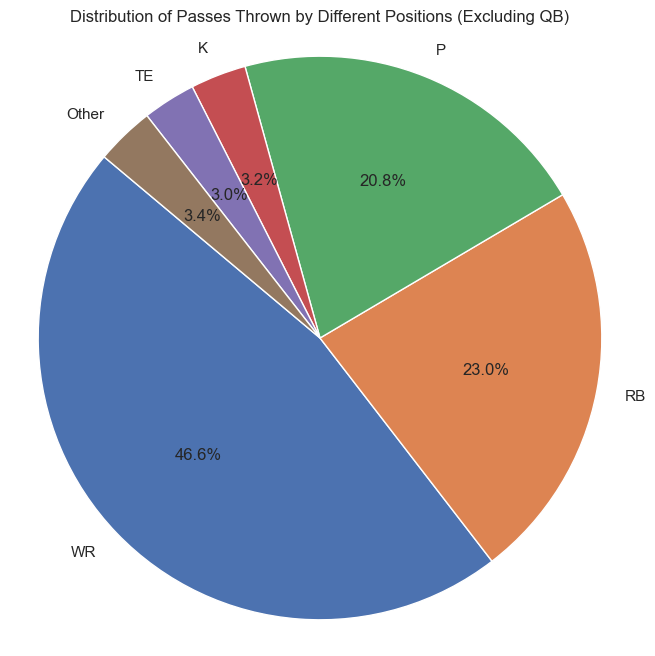

<Figure size 640x480 with 0 Axes>

In [627]:
# Data
positions = position_counts.index.tolist()
counts = position_counts.tolist()

# Group positions with less than 10 pass attempts into "Other"
threshold = 10
other_count = 0

# Create a filtered list of positions and counts
filtered_positions = []
filtered_counts = []

for i in range(len(positions)):
    if counts[i] >= threshold:
        filtered_positions.append(positions[i])
        filtered_counts.append(counts[i])
    else:
        other_count += counts[i]

# Add the "Other" category
filtered_positions.append("Other")
filtered_counts.append(other_count)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_counts, labels=filtered_positions, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Passes Thrown by Different Positions (Excluding QB)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the chart
plt.show()
plt.clf()

**Observing Player Positions with Limited Passing Attempts**

In this analysis, we have identified a variety of player positions that have made limited passing attempts in the NFL. These positions include wide receivers (WR), running backs (RB), punters (P), kickers (K), tight ends (TE), defensive backs (DB), fullbacks (FB), free safeties (FS), and more. Let's delve into some key insights:

1. **Diverse Contributions**: The NFL is home to a wide range of player positions, each with its own role and responsibilities on the field. While quarterbacks (QBs) are known for their passing prowess, other positions occasionally step into the passing game, albeit infrequently.

2. **Special Teams Involvement**: Punters (P) and kickers (K) are typically responsible for kicking and punting duties. However, it's intriguing to see that they have also taken part in passing plays, emphasizing their versatility.

3. **Rare Occurrences**: Several positions, like long snappers (LS), nose tackles (NT), and cornerbacks (LCB), have made minimal passing attempts, highlighting the unusual circumstances that lead to these positions participating in passing plays.

While quarterbacks remain the primary playmakers when it comes to passing, this analysis sheds light on the occasional involvement of other positions in the art of throwing the football. It showcases the versatility and adaptability of NFL players as they contribute to various aspects of the game, including passing, in unique and unexpected ways to try and catch a defense by surprise.

### **Age-Related Trends**

In [628]:
# Filter for quarterbacks (QB) and at least 10 games played
qb_passing_stats = passing_stats[(passing_stats['Position'] == 'QB') & (passing_stats['Games Played'] >= 10)]

# Group the data by year and age, and calculate the average passing performance
age_related_trends = qb_passing_stats.groupby(['Year', 'Age']).agg({
    'Passing Yards': 'mean',
    'Passing Touchdowns': 'mean',
    'Interceptions': 'mean',
    'Completion Percentage': 'mean'
}).reset_index()

# Print the first few rows of the age-related trends DataFrame
age_related_trends.head()


,Year,Age,Passing Yards,Passing Touchdowns,Interceptions,Completion Percentage
0,2001,24,2831.666667,16.333333,15.333333,62.666667
1,2001,25,3732.000000,25.666667,19.000000,58.800000
2,2001,26,2425.000000,15.000000,13.500000,57.900000
3,2001,27,3022.500000,15.000000,13.000000,58.000000
4,2001,28,1929.000000,10.333333,7.666667,50.166667


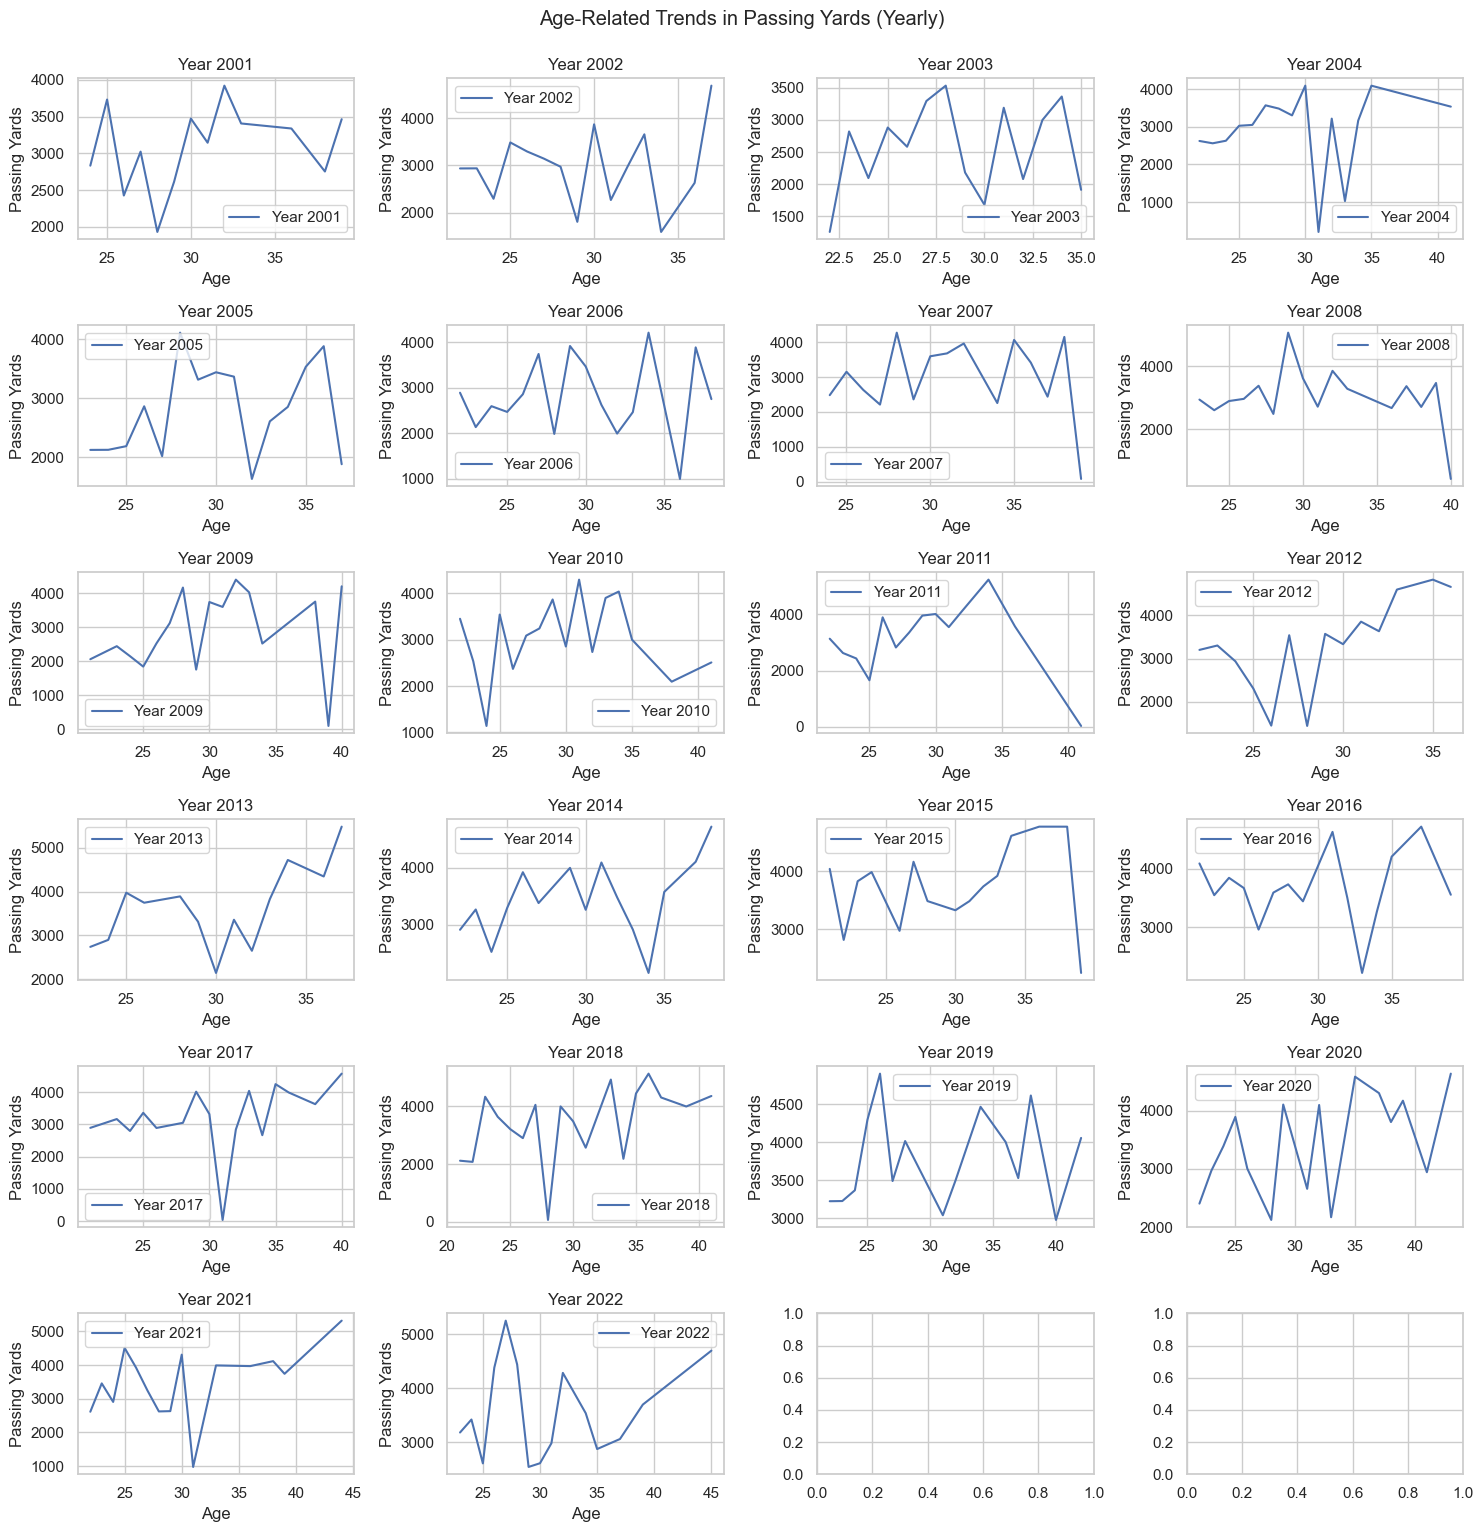

<Figure size 640x480 with 0 Axes>

In [629]:
# Get unique years from the DataFrame
years = age_related_trends['Year'].unique()

# Calculate the number of subplots needed
num_subplots = len(years)

# Define the number of columns for the grid
num_cols = 4

# Calculate the number of rows for the grid
num_rows = (num_subplots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
sns.set(style='whitegrid')

for i, year in enumerate(years):
    row, col = i // num_cols, i % num_cols
    ax = axes[row, col]
    
    # Filter data for the current year
    data = age_related_trends[age_related_trends['Year'] == year]
    
    # Create a line chart for passing yards by age
    sns.lineplot(x='Age', y='Passing Yards', data=data, ax=ax, label=f'Year {year}')
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Passing Yards')

# Adjust layout and spacing
plt.tight_layout()
plt.suptitle('Age-Related Trends in Passing Yards (Yearly)', y=1.02)

# Show the plots
plt.show()
plt.clf()

**Observations on Age-Related Trends in NFL Quarterbacks**

1. **Upward Trend for QBs:** There is a noticeable upward trend in passing yards for quarterbacks throughout their careers. Typically, this trend becomes evident in their early to mid-30s, indicating that quarterbacks tend to perform better as they gain experience.

2. **Lower Numbers for Younger QBs:** Some of the lower numbers in passing yards for younger quarterbacks can be attributed to their limited playtime, especially among rookies or backup quarterbacks who may not start consistently. This is a crucial factor to consider when analyzing age-related passing statistics.

3. **Prime Years in Early 30s:** It's apparent that quarterbacks tend to reach their prime performance in their early 30s. This age range often coincides with their peak years in terms of passing yards, and they are expected to deliver their best performance during this period.

4. **Drop-off in Late 30s:** As quarterbacks approach their late 30s and early 40s, there is generally a decline in their passing yards. This is a natural part of the aging process and is consistent with the physical demands of professional football.

5. **Outliers:** It's important to acknowledge that these age-related trends can be influenced by outliers. For instance, Tom Brady's remarkable longevity and exceptional performance well into his 40s defy the typical career trajectory of NFL quarterbacks. As one of if not the greatest quarterback of all time, Brady's career is exceptional and not representative of most quarterbacks.

In summary, these observations provide a comprehensive understanding of how age influences passing performance among NFL quarterbacks. While general trends exist, the presence of outliers like Tom Brady emphasizes that individual circumstances can significantly impact these trends.

### **Efficiency Metrics**

In [630]:
metrics_df.head()

,Year,Player Age,Completion Percentage,Yards Per Attempt,Adjusted Yards Per Attempt,QB Rating
0,2001,30,68.7,8.8,8.4,101.4
1,2001,25,62.7,7.6,6.6,84.1
2,2001,32,61.6,7.7,7.6,94.1
3,2001,25,55.9,6.9,6.0,76.4
4,2001,36,65.8,7.0,7.2,95.5


In [631]:
# Group the data by 'Year' and calculate the average Comp %, YPA, and AYA
age_grouped = metrics_df.groupby('Year')[['Completion Percentage', 'Yards Per Attempt', 'Adjusted Yards Per Attempt', 'QB Rating']].mean()

# Display the resulting DataFrame
age_grouped

,Completion Percentage,Yards Per Attempt,Adjusted Yards Per Attempt,QB Rating
Year,,,,
2001,54.723364,8.124299,7.452336,78.099065
2002,49.275701,6.884112,6.148598,73.762617
2003,48.382645,7.048760,5.205785,69.396694
2004,48.091304,6.546957,5.500870,71.849565
2005,52.259184,5.961224,5.714286,73.956122
2006,48.968367,6.166327,4.575510,72.247959
2007,56.088119,7.127723,7.414851,76.654455
2008,56.040777,6.650485,6.476699,76.655340
2009,51.017593,6.611111,4.065741,69.132407


**Trend of Increasing Quarterback Performance Over the Years**

The data clearly demonstrates a significant upward trend in quarterback performance over the years, particularly during the last decade (2012-2022). Notably, QB ratings have consistently remained high, with only one exception in 2017 when the average briefly dropped but immediately rebounded in 2018.

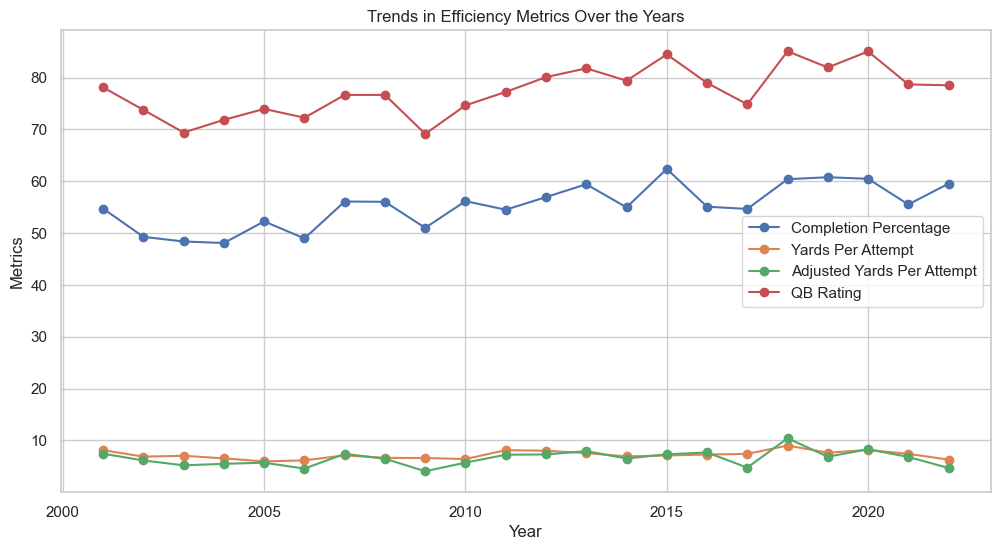

<Figure size 640x480 with 0 Axes>

In [632]:
# Group the data by year and calculate the mean of each metric
yearly_means = metrics_df.groupby('Year').mean()

# Plot the trends over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_means.index, yearly_means['Completion Percentage'], label='Completion Percentage', marker='o')
plt.plot(yearly_means.index, yearly_means['Yards Per Attempt'], label='Yards Per Attempt', marker='o')
plt.plot(yearly_means.index, yearly_means['Adjusted Yards Per Attempt'], label='Adjusted Yards Per Attempt', marker='o')
plt.plot(yearly_means.index, yearly_means['QB Rating'], label='QB Rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Metrics')
plt.title('Trends in Efficiency Metrics Over the Years')
plt.legend()
plt.grid(True)
plt.show()
plt.clf()

**Observations on Quarterback Performance Trends**

- **QB Rating and Completion Percentage**: QB Rating and Completion Percentage exhibit similar trends, with noticeable peaks and dips that align. Recent years indicate an overall improvement in these metrics, reflecting the increasing performance levels of quarterbacks. The data consistently portrays better metrics in recent years, highlighting the ongoing enhancement of quarterback performance in the NFL.

- **Adjusted Yards Per Attempt and Yards Per Attempt**: Adjusted Yards Per Attempt and Yards Per Attempt follow similar trajectories, although Adjusted Yards Per Attempt tends to fluctuate more prominently. Changes in Yards Per Attempt often correspond to Adjusted Yards Per Attempt adjustments.

## Results and Discussion

1. **Quarterback Performance Trends:** The analysis revealed a consistent upward trend in quarterback performance over the years. This trend encompasses key metrics like QB Rating, Completion Percentage, Yards Per Attempt, and Adjusted Yards Per Attempt.

2. **Interconnected Metrics:** QB Rating and Completion Percentage, as well as Adjusted Yards Per Attempt and Yards Per Attempt, exhibit strong correlations, indicating that these metrics often move in tandem.

3. **Recent Years' Improvement:** The most recent years (2020-2022) showed the best overall performance in terms of these metrics, reflecting an ongoing enhancement in quarterback efficiency.

4. **Age and Performance:** While age can influence performance, there's no clear linear trend. Some older quarterbacks maintain high performance, while younger quarterbacks also achieve remarkable results.

### Implications

1. **Continuous Improvement:** The NFL's transition to a more pass-oriented game is evident. Quarterbacks have consistently improved their efficiency over the past decade, potentially due to changes in offensive strategies and rule adjustments.

2. **Interconnected Metrics:** The strong correlation between QB Rating and Completion Percentage, as well as Adjusted Yards Per Attempt and Yards Per Attempt, suggests that these metrics can be predictive of each other.

3. **Age Diversity:** The data showcases the diversity of age ranges among successful quarterbacks, emphasizing that age is just one of many factors influencing performance.

## Conclusion

In summary, our analysis of NFL quarterback performance has unveiled compelling trends and insights. The data underscores a consistent upward trajectory in quarterback performance, with key metrics such as QB Rating, Completion Percentage, Yards Per Attempt, and Adjusted Yards Per Attempt all showing marked improvement over the years. Notably, these metrics exhibit strong correlations, highlighting their interdependence. The most recent years showcased the best overall performance, indicating a sustained enhancement in quarterback efficiency. While age may influence performance, the data suggests that it is not the sole determinant, as both younger and older quarterbacks achieve remarkable results. The findings underscore the NFL's shift towards a more pass-oriented game and raise opportunities for predictive modeling, exploration of external factors, inclusion of advanced metrics, comparative analysis with other sports leagues, and a focus on robust data collection in future research.